# Module Two Discussion: The Central Limit Theorem


### Step 1: Generating population data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# use gamma distribution to randomly generate 500 observations. 
shape, scale = 1.95, 2.5
tpcp = 100*np.random.gamma(shape, scale, 500)

# pandas library can be used to convert the array into a dataframe of rounded figures with the column name TPCP.
tpcp_df = pd.DataFrame(tpcp, columns=['TPCP'])
tpcp_df = tpcp_df.round(0)

# print the dataframe to see the first 5 and last 5 observations (note that the index of dataframe starts at 0).
print("TPCP data frame\n")
print(tpcp_df)

TPCP data frame

       TPCP
0     820.0
1     534.0
2     179.0
3    1079.0
4     399.0
..      ...
495   241.0
496   309.0
497   993.0
498   100.0
499   345.0

[500 rows x 1 columns]


### Step 2: Creating a histogram plot of population data

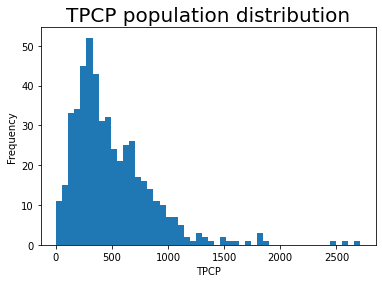

In [11]:
# create a figure for the plot. 
fig, ax = plt.subplots()

# create a histogram plot with 50 bins of TPCP population data. 
plt.hist(tpcp_df['TPCP'], bins=50)

# set a title for the plot, x-axis, and y-axis.
plt.title('TPCP population distribution', fontsize=20)
ax.set_xlabel('TPCP')
ax.set_ylabel('Frequency')

# show the plot.
plt.show()

The Population mean is 505.58

In [12]:
# You can use the "mean" method of a pandas dataframe.
pop_mean = tpcp_df['TPCP'].mean()
print("Population mean =", round(pop_mean,2))

Population mean = 503.02


### Step 4: Drawing one random sample from the population data and calculating the sample mean
Below is the sample mean. The sample mean is somewhat close to the population mean.

In [13]:
# use sample method of the dataframe to select a random sample, with replacement, of size 50.
tpcp_sample_df = tpcp_df.sample(50, replace=True)

# print the sample mean.
sample_mean = tpcp_sample_df['TPCP'].mean()
print("Sample mean =", round(sample_mean,2))

Sample mean = 534.08


### Step 5: Repeatedly drawing samples and saving the sample mean for each sample

In [14]:
# run a for loop to repeat the process Step 4 one thousand times to select one thousand samples.
# save the mean of each sample that was drawn in a Python list called means_list.
means_list = []
for i in range(1000):
    tpcp_sample_df = tpcp_df.sample(50, replace=True)
    sample_mean = tpcp_sample_df['TPCP'].mean()
    means_list.append(sample_mean)
    
# create a Python dataframe of means.
means_df = pd.DataFrame(means_list, columns=['means'])
print("Dataframe of 1000 sample means\n")
print(means_df)

Dataframe of 1000 sample means

      means
0    524.76
1    490.34
2    535.56
3    485.26
4    545.20
..      ...
995  488.86
996  429.86
997  577.08
998  467.64
999  508.82

[1000 rows x 1 columns]


### Step 6: Creating a histogram plot of the sample means from Step 5
In the below does have normal distribution since there is a bell curve to the list of means. 


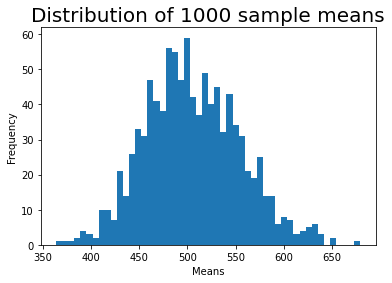

In [15]:
# create a figure for the plot. 
fig, ax = plt.subplots()

# create a histogram plot with 50 bins of 1,000 means. 
plt.hist(means_df['means'], bins=50)

# set a title for the plot, x-axis and y-axis.
plt.title('Distribution of 1000 sample means', fontsize=20) # title
ax.set_xlabel('Means')
ax.set_ylabel('Frequency')

# show the plot.
plt.show()

### Step 7: Mean and the standard deviation of the sample mean distribution


In [16]:
# calculate mean of the 1,000 sample means (this is called the grand mean or mean of the means).
mean1000 = means_df['means'].mean()
print("Grand Mean (Mean of 1000 sample means) =",round(mean1000,2))

# calculate standard deviation of the 1,000 sample means.
std1000 = means_df['means'].std()
print("Std Deviation of 1000 sample means =",round(std1000,2))

# print the probability that a specific mean is 450 or less for a Normal distribution with mean and standard deviation of 1,000 sample means.
prob_450_less_or_equal = st.norm.cdf(450, mean1000, std1000)
print("Probability that a specific mean is 450 or less =", round(prob_450_less_or_equal,4))

Grand Mean (Mean of 1000 sample means) = 505.62
Std Deviation of 1000 sample means = 49.3
Probability that a specific mean is 450 or less = 0.1296
